# **Sometimes you might get numpy.64 error, restart kernel to fix it.**

(64, 64)


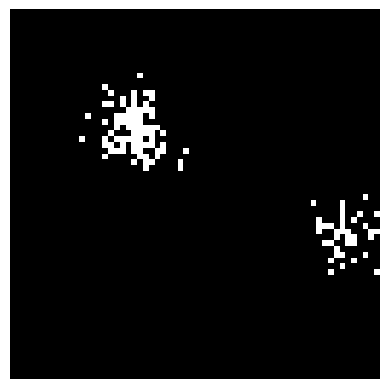

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import math

# Open the image using Pillow
img = Image.open("/content/1.png") #Your image here in grayscale
img_gray = img.convert('L')
img_array = np.array(img_gray)
print(img_array.shape)

# Create a plot to show the image
plt.imshow(img_array, cmap='gray')
plt.axis('off')
plt.show()

# Here we implement the K-Means ++ clustering method, basically the ++ indicates that we intitialize the first centroids as far away from each other as possible and then update centroids

In [ ]:
#Function for 300 or less iterations with some k
def model(arr, k, iter = 300):
  wcss = 0

  all_points = []
  for i in range (len(arr)):
     for j in range (len(arr[0])):
        if (arr[i,j] != 0):
          all_points.append((i,j))

  centroids = []
  centroids.append(random.choice(all_points)) #First centroid at random

  for i in range(k-1): #Initialize the rest as far from its nearest centroid
    minDist = -1
    for point in all_points:
      dist = min([np.linalg.norm(np.array(point) - np.array(centr)) for centr in centroids])
      if (dist > minDist):
        minDist = dist
        next = point
    centroids.append(next)

  out = centroids #for debugging and checking if ++ is working

  for o in range (iter):

    clusters = {}

    for i in range (k):
      clusters[i] = []

    for point in all_points:
      dist = [np.linalg.norm(np.array(point) - np.array(centr)) for centr in centroids] #initialize clusters
      cluster = dist.index(min(dist))
      clusters[cluster].append(point)

    centroids.sort(key=lambda tup: tup[0]) #sort centroids on basis of x values so we can compare it to new one effectively
    oldCent = centroids.copy()

    for cluster in clusters:
      cluster_points = np.array(clusters[cluster])
      centroid_average = np.mean(cluster_points, axis=0)
      centroids[cluster] = tuple(map(int, centroid_average))

    centroids.sort(key=lambda tup: tup[0]) #sort new centroids

    if all(np.linalg.norm(np.array(centroids[i]) - np.array(oldCent[i])) == 0 for i in range(k)): #calculate wcss with a another new centroids set for minimal error
      for cluster in clusters:
        cluster_points = np.array(clusters[cluster])
        centroid_average = np.mean(cluster_points, axis=0)
        wcss += np.sum((cluster_points - centroid_average) ** 2)
        centroids[cluster] = tuple(map(int, centroid_average))
      return clusters, centroids, wcss, all_points, out

  return clusters, centroids, wcss, all_points, out

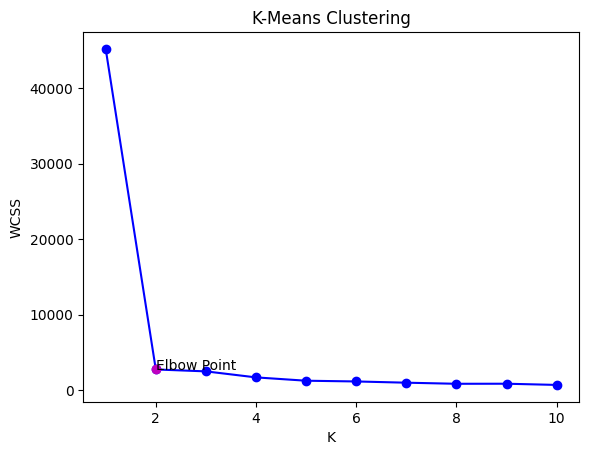

In [ ]:
#Elbow method applied here
points = []

for k in range(1,11):
  wcss = model(img_array, k)[2]
  points.append((k, wcss))

line_vec = (points[-1][0] - points[0][0], points[-1][1] - points[0][1])
line_vec_norm = line_vec / np.sqrt(line_vec[0]**2 + line_vec[1]**2)

distances = []
for point in points:
    vector = (point[0] - points[0][0], point[1] - points[0][1])
    dist_to_line = np.linalg.norm(vector - np.dot(vector, line_vec_norm) * line_vec_norm)
    distances.append(dist_to_line)

elbow_index = np.argmax(distances) #index of the elbow point
elbow_point = points[elbow_index]


x_values = [point[0] for point in points]
y_values = [point[1] for point in points]

plt.plot(x_values, y_values, color='blue', marker='o')
plt.plot(elbow_point[0], elbow_point[1], 'mo', label='Elbow Point')
plt.text(elbow_point[0], elbow_point[1], 'Elbow Point')
plt.title('K-Means Clustering')
plt.xlabel('K')
plt.ylabel('WCSS')

# Show the plot
plt.show()

2
[(20, 21), (38, 57)]
[(20, 21), (38, 57)]


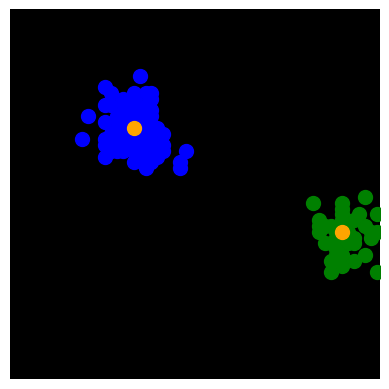

In [ ]:
# Create a plot to show the image
k = elbow_point[0]
print(k)
colors = ['b','g','r','c','m','y']

final = model(img_array, k)
centroids = final[1]
clusters = final[0]
out = final[4]
print(final[4])
print(centroids)

plt.imshow(img_array, cmap='gray')
for i in range(k):
  color = colors[i % len(colors)]
  for c in clusters[i]:
    plt.scatter(c[1], c[0], color=color, s=100)  # clusters plotted with different colors

for (x, y) in centroids:
  plt.scatter(y, x, color='orange', s=100)  # Centroid plotted with orange color
plt.axis('off')
plt.show()

In [ ]:
#Matrix for distance between centroids
def distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

distance_matrix = np.zeros((k, k))

for i in range(k):
    for j in range(k):
        distance_matrix[i, j] = distance(centroids[i], centroids[j])

distance_df = pd.DataFrame(distance_matrix, columns=[f"Centroid {i+1}" for i in range(k)],
                           index=[f"Centroid {i+1}" for i in range(k)])

print(distance_df)

            Centroid 1  Centroid 2
Centroid 1    0.000000   40.249224
Centroid 2   40.249224    0.000000
